In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import kruskal
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv("C:\\Users\\Aravind kumaran\\Downloads\\Indian automoble buying behavour study 1.0.csv")
df

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,27,Business,Single,Graduate,0,No,No,No,2400000,0,2400000,SUV,1600000
95,50,Salaried,Married,Post Graduate,3,No,No,Yes,3800000,1300000,5100000,SUV,1600000
96,51,Business,Married,Graduate,2,Yes,Yes,No,2200000,0,2200000,Ciaz,1100000
97,51,Salaried,Married,Post Graduate,2,No,No,Yes,2700000,1300000,4000000,Creata,1500000


In [3]:
df.isnull().sum()

Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
House Loan          0
Wife Working        0
Salary              0
Wife Salary         0
Total Salary        0
Make                0
Price               0
dtype: int64

In [4]:
df.drop(columns=['No of Dependents', 'Make', 'Price','Wife Working','Salary','Wife Salary'], inplace=True)
 

In [5]:
df.drop(columns=['Education'], inplace=True)


In [6]:
df

,Age,Profession,Marrital Status,Personal loan,House Loan,Total Salary
0,27,Salaried,Single,Yes,No,800000
1,35,Salaried,Married,Yes,Yes,2000000
2,45,Business,Married,Yes,Yes,1800000
3,41,Business,Married,No,No,2200000
4,31,Salaried,Married,Yes,No,2600000
...,...,...,...,...,...,...
94,27,Business,Single,No,No,2400000
95,50,Salaried,Married,No,No,5100000
96,51,Business,Married,Yes,Yes,2200000
97,51,Salaried,Married,No,No,4000000


In [7]:
# Drop the 'Marrital Status' column
df.drop('Marrital Status', axis=1, inplace=True)

 

In [8]:
df

,Age,Profession,Personal loan,House Loan,Total Salary
0,27,Salaried,Yes,No,800000
1,35,Salaried,Yes,Yes,2000000
2,45,Business,Yes,Yes,1800000
3,41,Business,No,No,2200000
4,31,Salaried,Yes,No,2600000
...,...,...,...,...,...
94,27,Business,No,No,2400000
95,50,Salaried,No,No,5100000
96,51,Business,Yes,Yes,2200000
97,51,Salaried,No,No,4000000


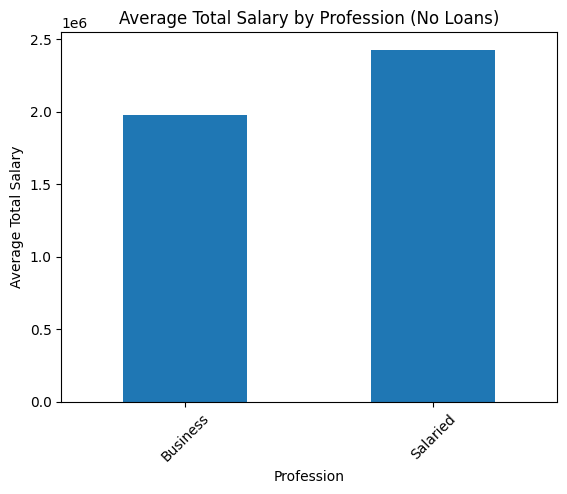

In [30]:
# Filter the dataset
no_loan_df = df[(df['Personal loan'] == 'No') & (df['House Loan'] == 'No')]

# Calculate average total salary for each profession
average_salary_by_profession = no_loan_df.groupby('Profession')['Total Salary'].mean()

# Visualize the average salary by profession
average_salary_by_profession.plot(kind='bar')
plt.xlabel('Profession')
plt.ylabel('Average Total Salary')
plt.title('Average Total Salary by Profession (No Loans)')
plt.xticks(rotation=45)
plt.show()


In [38]:
single_loan_df = df[(df['Personal loan'] != df['House Loan'])]
single_loan_df 

,Age,Profession,Personal loan,House Loan,Total Salary
0,27,Salaried,Yes,No,800000
4,31,Salaried,Yes,No,2600000
13,30,Business,Yes,No,1400000
17,27,Salaried,Yes,No,800000
20,37,Salaried,No,Yes,2500000
21,35,Business,No,Yes,1900000
24,35,Salaried,Yes,No,2000000
32,41,Salaried,No,Yes,3000000
45,34,Salaried,No,Yes,3600000
47,36,Business,No,Yes,2600000


In [40]:
# Filter the dataset
single_loan_df = df[(df['Personal loan'] != df['House Loan'])]

# Calculate average total salary for each profession
average_salary_by_profession = single_loan_df.groupby('Profession')['Total Salary'].mean()
average_salary_by_profession

Profession
Business    1980000.0
Salaried    2531250.0
Name: Total Salary, dtype: float64

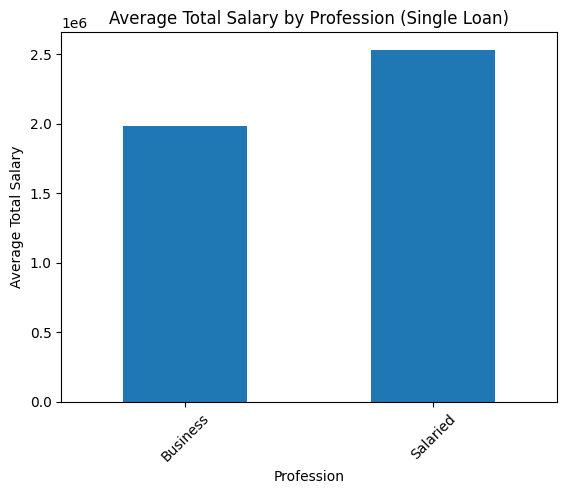

In [41]:

# Visualize the average salary by profession
average_salary_by_profession.plot(kind='bar')
plt.xlabel('Profession')
plt.ylabel('Average Total Salary')
plt.title('Average Total Salary by Profession (Single Loan)')
plt.xticks(rotation=45)
plt.show()


In [39]:
# Filter the dataset to include only those individuals who have both personal and house loans
both_loans_df = df[(df['Personal loan'] == 'Yes') & (df['House Loan'] == 'Yes')]

# Display the filtered DataFrame including age, profession, total salary, personal loan status, and house loan status
print(both_loans_df[['Age', 'Profession', 'Total Salary', 'Personal loan', 'House Loan']])


    Age Profession  Total Salary Personal loan House Loan
1    35   Salaried       2000000           Yes        Yes
2    45   Business       1800000           Yes        Yes
5    28   Salaried        900000           Yes        Yes
9    34   Salaried       1900000           Yes        Yes
11   35   Salaried       1400000           Yes        Yes
14   31   Business       1300000           Yes        Yes
26   35   Salaried       1300000           Yes        Yes
28   36   Salaried       2600000           Yes        Yes
34   42   Salaried       2100000           Yes        Yes
40   31   Business       1700000           Yes        Yes
44   34   Salaried       1600000           Yes        Yes
55   41   Salaried       3100000           Yes        Yes
63   31   Salaried       1800000           Yes        Yes
66   39   Business       3600000           Yes        Yes
68   39   Salaried       4000000           Yes        Yes
76   36   Business       1900000           Yes        Yes
80   46   Sala

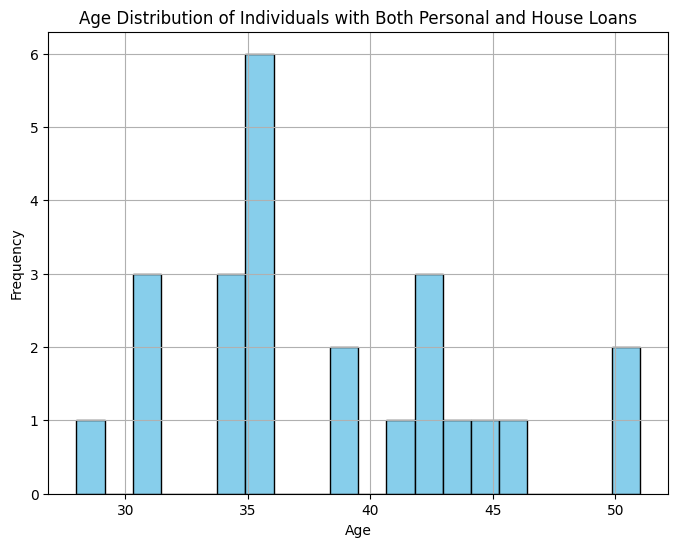

In [34]:

# Create a histogram of age
plt.figure(figsize=(8, 6))
plt.hist(both_loans_df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Individuals with Both Personal and House Loans')
plt.grid(True)
plt.show()


In [42]:
# Perform one-hot encoding for categorical columns
encoded_df = pd.get_dummies(df, columns=['Profession', 'Personal loan', 'House Loan'])

# Display the encoded DataFrame
print(encoded_df.head())

   Age  Total Salary  Profession_Business  Profession_Salaried  \
0   27        800000                    0                    1   
1   35       2000000                    0                    1   
2   45       1800000                    1                    0   
3   41       2200000                    1                    0   
4   31       2600000                    0                    1   

   Personal loan_No  Personal loan_Yes  House Loan_No  House Loan_Yes  
0                 0                  1              1               0  
1                 0                  1              0               1  
2                 0                  1              0               1  
3                 1                  0              1               0  
4                 0                  1              1               0  


In [49]:
from sklearn.cluster import KMeans

# Initialize KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)


In [50]:
# Fit the model to the data
clusters = kmeans.fit_predict(encoded_df)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


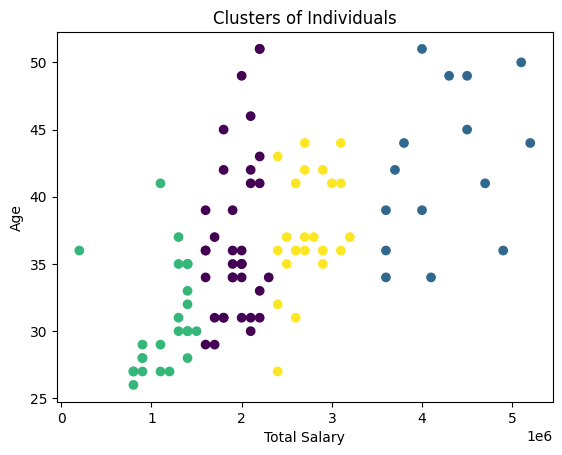

In [51]:
# Visualize clusters (for 2D or 3D data)
# For example, if you have only two features 'Total Salary' and 'Age'
plt.scatter(encoded_df['Total Salary'], encoded_df['Age'], c=clusters, cmap='viridis')
plt.xlabel('Total Salary')
plt.ylabel('Age')
plt.title('Clusters of Individuals')
plt.show()


In [52]:
# Add cluster labels to the original DataFrame
df['Cluster'] = clusters

# Analyze characteristics of each cluster
cluster_means = df.groupby('Cluster').mean()
print(cluster_means)


               Age  Total Salary
Cluster                         
0        36.861111  1.938889e+06
1        42.200000  4.240000e+06
2        30.920000  1.144000e+06
3        37.478261  2.730435e+06


C:\Users\Aravind kumaran\AppData\Local\Temp\ipykernel_29048\2875018250.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_means = df.groupby('Cluster').mean()


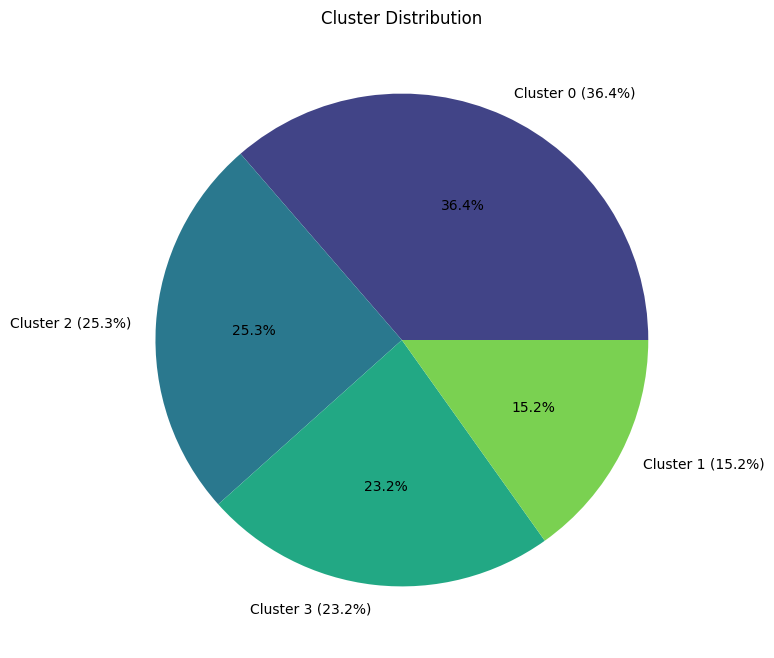

In [54]:
# Count the number of data points in each cluster
cluster_counts = df['Cluster'].value_counts()

# Calculate the total number of data points
total_data_points = cluster_counts.sum()

# Calculate the percentages for each cluster
cluster_percentages = (cluster_counts / total_data_points) * 100

# Plot a pie chart with labels
plt.figure(figsize=(8, 8))
plt.pie(cluster_counts, labels=[f'Cluster {i} ({cluster_percentages[i]:.1f}%)' for i in cluster_counts.index], autopct='%1.1f%%', colors=sns.color_palette('viridis', len(cluster_counts)))
plt.title('Cluster Distribution')
plt.show()


In [9]:
# Perform one-hot encoding for the categorical columns
encoded_df = pd.get_dummies(df, columns=['Profession', 'Personal loan', 'House Loan'])

# Display the encoded DataFrame
print(encoded_df)


    Age  Total Salary  Profession_Business  Profession_Salaried  \
0    27        800000                    0                    1   
1    35       2000000                    0                    1   
2    45       1800000                    1                    0   
3    41       2200000                    1                    0   
4    31       2600000                    0                    1   
..  ...           ...                  ...                  ...   
94   27       2400000                    1                    0   
95   50       5100000                    0                    1   
96   51       2200000                    1                    0   
97   51       4000000                    0                    1   
98   51       2200000                    0                    1   

    Personal loan_No  Personal loan_Yes  House Loan_No  House Loan_Yes  
0                  0                  1              1               0  
1                  0                  1          

In [17]:
encoded_df

,Age,Total Salary,Profession_Business,Profession_Salaried,Personal loan_No,Personal loan_Yes,House Loan_No,House Loan_Yes
0,27,800000,0,1,0,1,1,0
1,35,2000000,0,1,0,1,0,1
2,45,1800000,1,0,0,1,0,1
3,41,2200000,1,0,1,0,1,0
4,31,2600000,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...
94,27,2400000,1,0,1,0,1,0
95,50,5100000,0,1,1,0,1,0
96,51,2200000,1,0,0,1,0,1
97,51,4000000,0,1,1,0,1,0


In [18]:
# Calculate the correlation matrix
correlation_matrix = encoded_df.corr()

# Display the correlation matrix
print(correlation_matrix)


                          Age  Total Salary  Profession_Business  \
Age                  1.000000      0.587082             0.003537   
Total Salary         0.587082      1.000000            -0.199570   
Profession_Business  0.003537     -0.199570             1.000000   
Profession_Salaried -0.003537      0.199570            -1.000000   
Personal loan_No     0.007021      0.139700             0.059321   
Personal loan_Yes   -0.007021     -0.139700            -0.059321   
House Loan_No       -0.182816     -0.137476             0.090875   
House Loan_Yes       0.182816      0.137476            -0.090875   

                     Profession_Salaried  Personal loan_No  Personal loan_Yes  \
Age                            -0.003537          0.007021          -0.007021   
Total Salary                    0.199570          0.139700          -0.139700   
Profession_Business            -1.000000          0.059321          -0.059321   
Profession_Salaried             1.000000         -0.059321     